<a href="https://colab.research.google.com/github/AnhVietPham/Deep-Learning/blob/main/DLTensorflow/%08Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install d2l

In [ ]:
import math
import numpy as np
import tensorflow as tf
from d2l import tensorflow as d2l

In [ ]:
max_degree = 20
n_train, n_test = 100, 100
true_w = np.zeros(max_degree)
true_w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [ ]:
true_w[0:4]

array([0., 0., 0., 0.])

In [ ]:
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])
true_w

array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ])

In [ ]:
features = np.random.normal(size=(n_train + n_test, 1))
features.shape

(200, 1)

In [ ]:
np.random.shuffle(features)

In [ ]:
np.arange(max_degree).reshape(1, -1).shape

(1, 20)

In [ ]:
np.arange(max_degree)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
np.array([1, 2, 3, 4]).reshape(4, -1)

array([[1],
       [2],
       [3],
       [4]])

In [ ]:
test_power = np.power(np.array([1, 2, 3, 4]).reshape(4, -1),[[2, 2, 2]])
test_power

array([[ 1,  1,  1],
       [ 4,  4,  4],
       [ 9,  9,  9],
       [16, 16, 16]])

In [ ]:
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
poly_features.shape

(200, 20)

In [ ]:
poly_features

array([[ 1.00000000e+00, -2.00163523e-01,  4.00654358e-02, ...,
        -1.32905791e-12,  2.66028914e-13, -5.32492846e-14],
       [ 1.00000000e+00,  7.32765300e-01,  5.36944985e-01, ...,
         5.06294510e-03,  3.70995049e-03,  2.71852298e-03],
       [ 1.00000000e+00, -2.07901585e+00,  4.32230691e+00, ...,
        -2.53269334e+05,  5.26550961e+05, -1.09470779e+06],
       ...,
       [ 1.00000000e+00, -4.46393223e-03,  1.99266910e-05, ...,
        -1.10968337e-40,  4.95355136e-43, -2.21123176e-45],
       [ 1.00000000e+00,  4.57139531e-01,  2.08976551e-01, ...,
         1.66275873e-06,  7.60112744e-07,  3.47477584e-07],
       [ 1.00000000e+00,  4.94031078e-01,  2.44066706e-01, ...,
         6.22046116e-06,  3.07310113e-06,  1.51820746e-06]])

In [ ]:
a = np.array([[1,2,3],[4,5,6],[7,8,9],[10, 11, 12], [13, 14, 15]])

In [ ]:
a

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [ ]:
print(a[:4:3, 1])
print()
print(a[:2, 1])
print()
print(a[:2, :2])
print()
print(a[:, 0])

[ 2 11]

[2 5]

[[1 2]
 [4 5]]

[ 1  4  7 10 13]


In [ ]:
math.gamma(4)

6.0

In [ ]:
test_data1 = np.arange(5)
print(test_data1)
print()
test_date2 = np.array([[1],[2],[3],[4]])
print(test_date2)
print()
test_date3 = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(test_date3)
print()
test_date4 = np.array([[1],[4],[7],[10]])
print(test_date4)
print()

[0 1 2 3 4]

[[1]
 [2]
 [3]
 [4]]

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]

[[ 1]
 [ 4]
 [ 7]
 [10]]



In [ ]:
test_data1, test_date2, test_date3, test_date4 = [
    tf.constant(x, dtype=tf.float32)
    for x in [test_data1, test_date2, test_date3, test_date4]]

print(test_data1)
print()
print(test_date2)
print()
print(test_date3)
print()
print(test_date4)
print()

tf.Tensor([0. 1. 2. 3. 4.], shape=(5,), dtype=float32)

tf.Tensor(
[[1.]
 [2.]
 [3.]
 [4.]], shape=(4, 1), dtype=float32)

tf.Tensor(
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]
 [10. 11. 12.]], shape=(4, 3), dtype=float32)

tf.Tensor(
[[ 1.]
 [ 4.]
 [ 7.]
 [10.]], shape=(4, 1), dtype=float32)



In [ ]:
max_degree = 20
n_train, n_test = 100, 100 
true_w = np.zeros(max_degree)  
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1))
np.random.shuffle(features)
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1))
for i in range(max_degree):
    poly_features[:, i] /= math.gamma(i + 1)
labels = np.dot(poly_features, true_w)
labels += np.random.normal(scale=0.1, size=labels.shape)

In [ ]:
true_w, features, poly_features, labels = [
      tf.constant(x, dtype=tf.float32)
      for x in [true_w, features, poly_features, labels]]

true_w, features[:2], poly_features[:2, :], labels[:2]

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([ 5. ,  1.2, -3.4,  5.6,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       dtype=float32)>, <tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[0.5401927],
        [0.4512339]], dtype=float32)>, <tf.Tensor: shape=(2, 20), dtype=float32, numpy=
 array([[1.0000000e+00, 5.4019272e-01, 1.4590409e-01, 2.6272113e-02,
         3.5480012e-03, 3.8332090e-04, 3.4511195e-05, 2.6632424e-06,
         1.7983302e-07, 1.0793833e-08, 5.8307503e-10, 2.8633901e-11,
         1.2889854e-12, 5.3561583e-14, 2.0666842e-15, 7.4427184e-17,
         2.5128142e-18, 7.9847292e-20, 2.3962738e-21, 6.8128931e-23],
        [1.0000000e+00, 4.5123389e-01, 1.0180601e-01, 1.5312773e-02,
         1.7274106e-03, 1.5589323e-04, 1.1724052e-05, 7.5575559e-07,
         4.2627818e-08, 2.1372351e-09, 9.6439287e-11, 3.9560612e-12,
         1.4875907e-13, 5.1634718e-15, 1.6642382e-16, 5.0064044e-18,
         1.4

In [ ]:
poly_features.shape[-1]

20

In [ ]:
def evaluate_loss(net, data_iter, loss):
    metric = d2l.Accumulator(2)
    for X, y in data_iter:
        l = loss(net(X), y)
        metric.add(tf.reduce_sum(l), tf.size(l).numpy())
    return metric[0] / metric[1]

In [ ]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = tf.losses.MeanSquaredError()
    net = tf.keras.Sequential()
    net.add(tf.keras.layers.Dense(1, use_bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = d2l.load_array((train_features, train_labels), batch_size)
    test_iter = d2l.load_array((test_features, test_labels), batch_size,
                               is_train=False)
    trainer = tf.keras.optimizers.SGD(learning_rate=.01)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        d2l.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(
                net, train_iter, loss), evaluate_loss(net, test_iter, loss)))
    print('weight:', net.get_weights()[0].T)

weight: [[ 5.0009103  1.2283603 -3.3985548  5.5652866]]


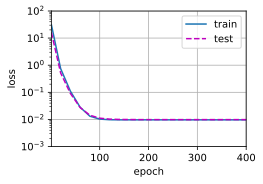

In [ ]:
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

weight: [[3.1304612 5.0366597]]


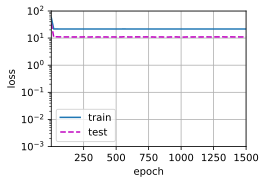

In [ ]:
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:], num_epochs=1500)

weight: [[ 5.007053    1.2999353  -3.4138598   5.232205   -0.01387001  0.7278417
   0.27734342 -0.16925958 -0.16219567  0.4859721  -0.4766157  -0.29858813
   0.46280006  0.25346407 -0.4735661  -0.02673422 -0.24869978 -0.45186418
   0.50665087 -0.02520305]]


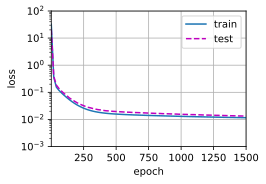

In [ ]:
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)